In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
# Data has been filtered to California and 2001 to 2011
# 5 MeasureIDs out of 10 were kept
df = pd.read_csv('Data/Cleaner/Air.csv').drop('Unnamed: 0',1)

In [15]:
df.shape

(3190, 11)

In [16]:
df.head()

,MeasureId,MeasureName,MeasureType,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
0,292,Number of days with maximum 8-hour average ozo...,Counts,6001,Alameda,2001,7.0,No Units,No Units,Monitor Only,1
1,292,Number of days with maximum 8-hour average ozo...,Counts,6001,Alameda,2002,10.0,No Units,No Units,Monitor Only,1
2,292,Number of days with maximum 8-hour average ozo...,Counts,6001,Alameda,2003,6.0,No Units,No Units,Monitor Only,1
3,292,Number of days with maximum 8-hour average ozo...,Counts,6001,Alameda,2004,4.0,No Units,No Units,Monitor Only,1
4,292,Number of days with maximum 8-hour average ozo...,Counts,6001,Alameda,2005,2.0,No Units,No Units,Monitor Only,1


In [17]:
set(df['ReportYear'])

{2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011}

In [18]:
len(list(set(df['CountyFips'])))

58

In [94]:
ids = list(set(df['MeasureId']))
print(x)
dic = {}
for num in ids:
    d = df[df['MeasureId'] == num]
    dic[num] = list(set(d['MeasureName']))
    dic[num] += list(set(d['MeasureType']))
dic

[292, 293, 294, 295, 296]


{292: ['Number of days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard (monitor and modeled data)',
  'Counts'],
 293: ['Number of person-days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard (monitor and modeled data)',
  'Counts'],
 294: ['Percent of days with PM2.5 levels over the National Ambient Air Quality Standard (monitor and modeled data)',
  'Percent'],
 295: ['Number of person-days with PM2.5 over the National Ambient Air Quality Standard (monitor and modeled data)',
  'Counts'],
 296: ['Annual average ambient concentrations of PM 2.5 in micrograms per cubic meter, based on seasonal averages and daily measurement (monitor and modeled data)',
  'Average']}

In [ ]:
(df[df['MeasureId']] == 292)

In [25]:
df['CountyFips'] = df['CountyFips']-6000
x = ['MeasureId', 'MeasureType', 'CountyFips',
     'ReportYear', 'Unit', 'UnitName', 'Value']
newdf = df[x]
newdf.head()

,MeasureId,MeasureType,CountyFips,ReportYear,Unit,UnitName,Value
0,292,Counts,1,2001,No Units,No Units,7.0
1,292,Counts,1,2002,No Units,No Units,10.0
2,292,Counts,1,2003,No Units,No Units,6.0
3,292,Counts,1,2004,No Units,No Units,4.0
4,292,Counts,1,2005,No Units,No Units,2.0


In [26]:
print(set(newdf['Unit']))
print(set(newdf['UnitName']))
print(set(newdf['MeasureType']))

{'No Units', '%', 'µg/m³'}
{'Micograms per cubic meter', 'No Units', 'Percent'}
{'Counts', 'Percent', 'Average'}


In [30]:
Air = pd.pivot_table(newdf,index=['CountyFips','ReportYear'],columns='MeasureId',values ='Value').reset_index()
Air.columns = ['C Fips', 'Year', 292, 293, 294, 295, 296]
Air.head()

,C Fips,Year,292,293,294,295,296
0,1,2001,7.0,10286388.0,3.835616,20572776.0,13.007198
1,1,2002,10.0,14621060.0,6.301370,33628438.0,14.190016
2,1,2003,6.0,8724978.0,0.821918,4362489.0,12.459122
3,1,2004,4.0,5782884.0,3.005464,15902931.0,11.617424
4,1,2005,2.0,2883090.0,2.191781,11532360.0,11.197772


In [31]:
Air.shape

(638, 7)

In [33]:
len(list(set(Air['C Fips'])))

58

In [34]:
Air.isnull().sum()

C Fips    0
Year      0
292       0
293       0
294       0
295       0
296       0
dtype: int64

In [53]:
ca = Air.groupby(['Year'])[[292,293,294,295,296]].mean().reset_index()
ca

,Year,292,293,294,295,296
0,2001,26.517241,3.103512e+07,4.718942,2.901138e+07,13.067219
1,2002,31.362069,3.531827e+07,5.918753,2.699138e+07,14.128501
2,2003,29.913793,3.881382e+07,2.177610,1.929359e+07,12.631340
3,2004,20.724138,3.369404e+07,2.600339,1.664124e+07,11.875504
4,2005,18.068966,2.890554e+07,2.711384,1.274145e+07,11.379724
5,2006,24.965517,3.152818e+07,2.243741,9.690436e+06,11.844669
6,2007,16.758621,2.726108e+07,3.367974,1.368458e+07,10.943009
7,2008,23.017241,3.031140e+07,4.677784,9.537803e+06,12.978071
8,2009,15.275862,2.915380e+07,1.525744,5.367476e+06,10.483145
9,2010,12.551724,2.390419e+07,0.717997,2.960587e+06,8.804286


In [61]:
dic[num]

"{'Annual average ambient concentrations of PM 2.5 in micrograms per cubic meter, based on seasonal averages and daily measurement (monitor and modeled data)'}"

/Users/d/anaconda/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


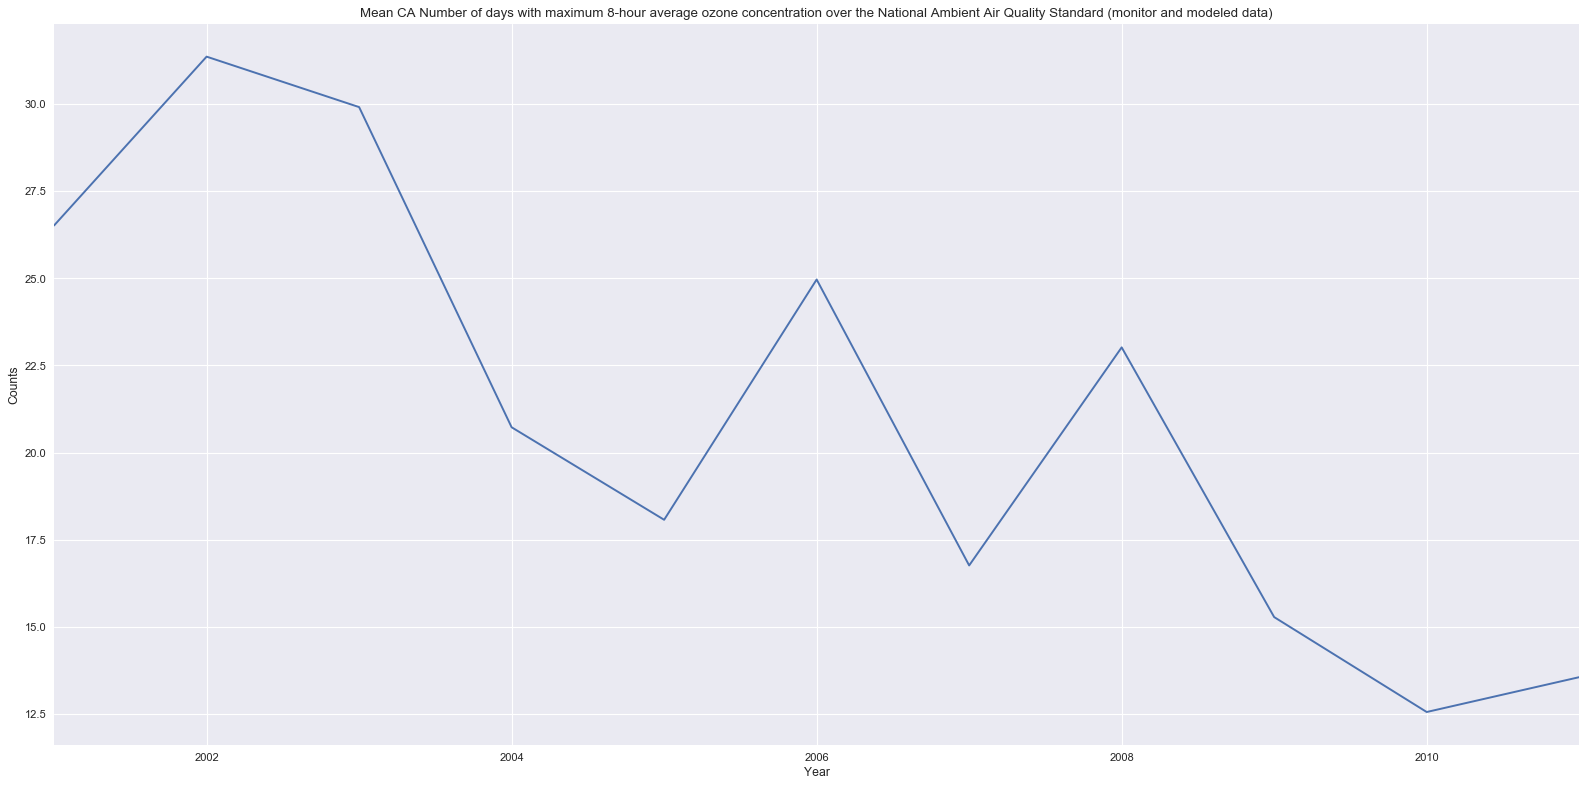

In [96]:
num = 292
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Mean CA {}'.format(dic[num][0]))
sns.tsplot(data=ca[num], time=ca['Year'], value=dic[num][1])
plt.tight_layout()

/Users/d/anaconda/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


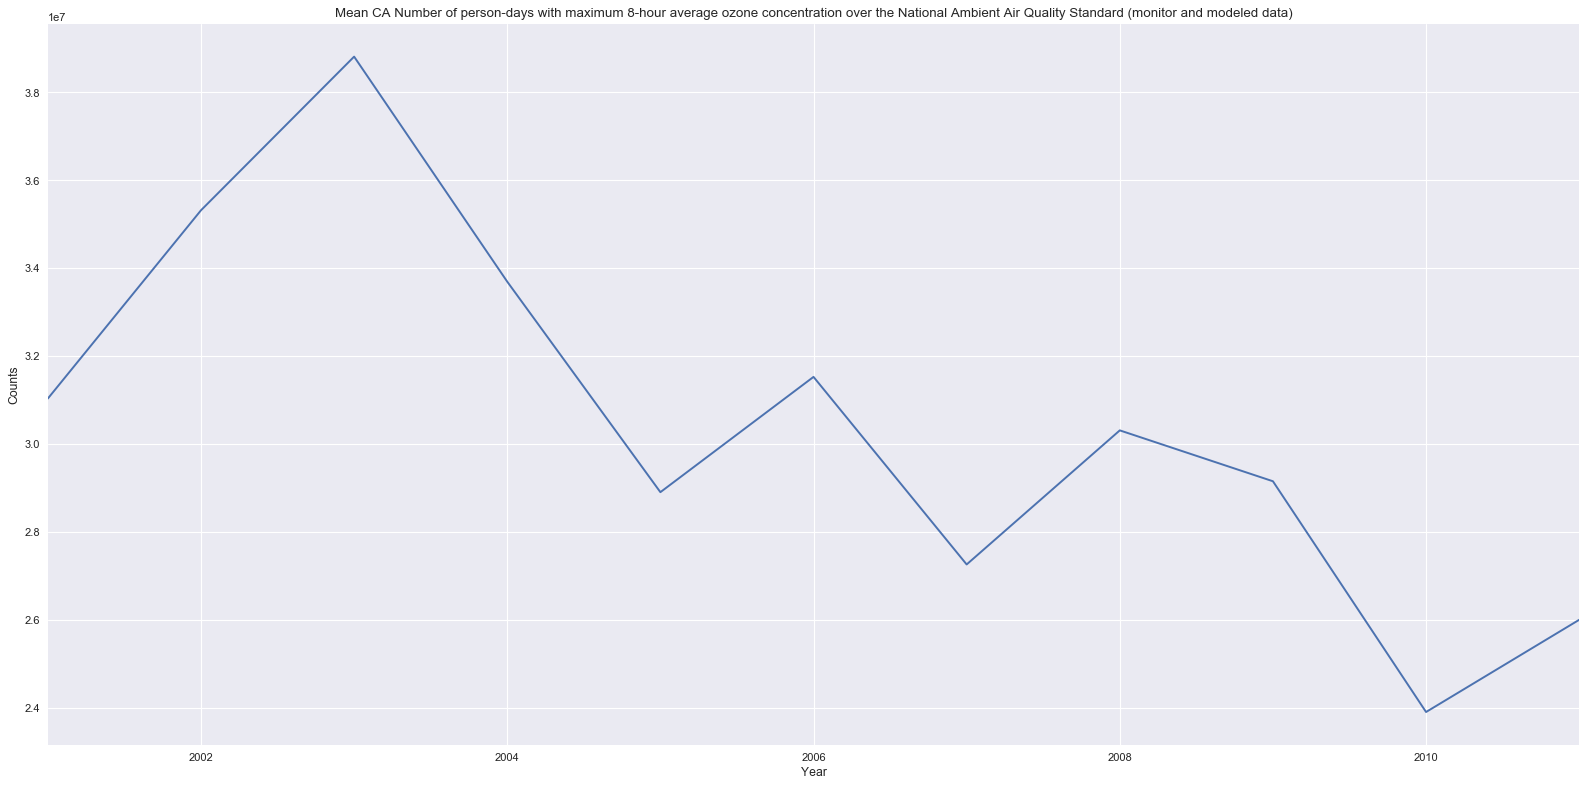

In [97]:
num = 293
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Mean CA {}'.format(dic[num][0]))
sns.tsplot(data=ca[num], time=ca['Year'], value=dic[num][1])
plt.tight_layout()

/Users/d/anaconda/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


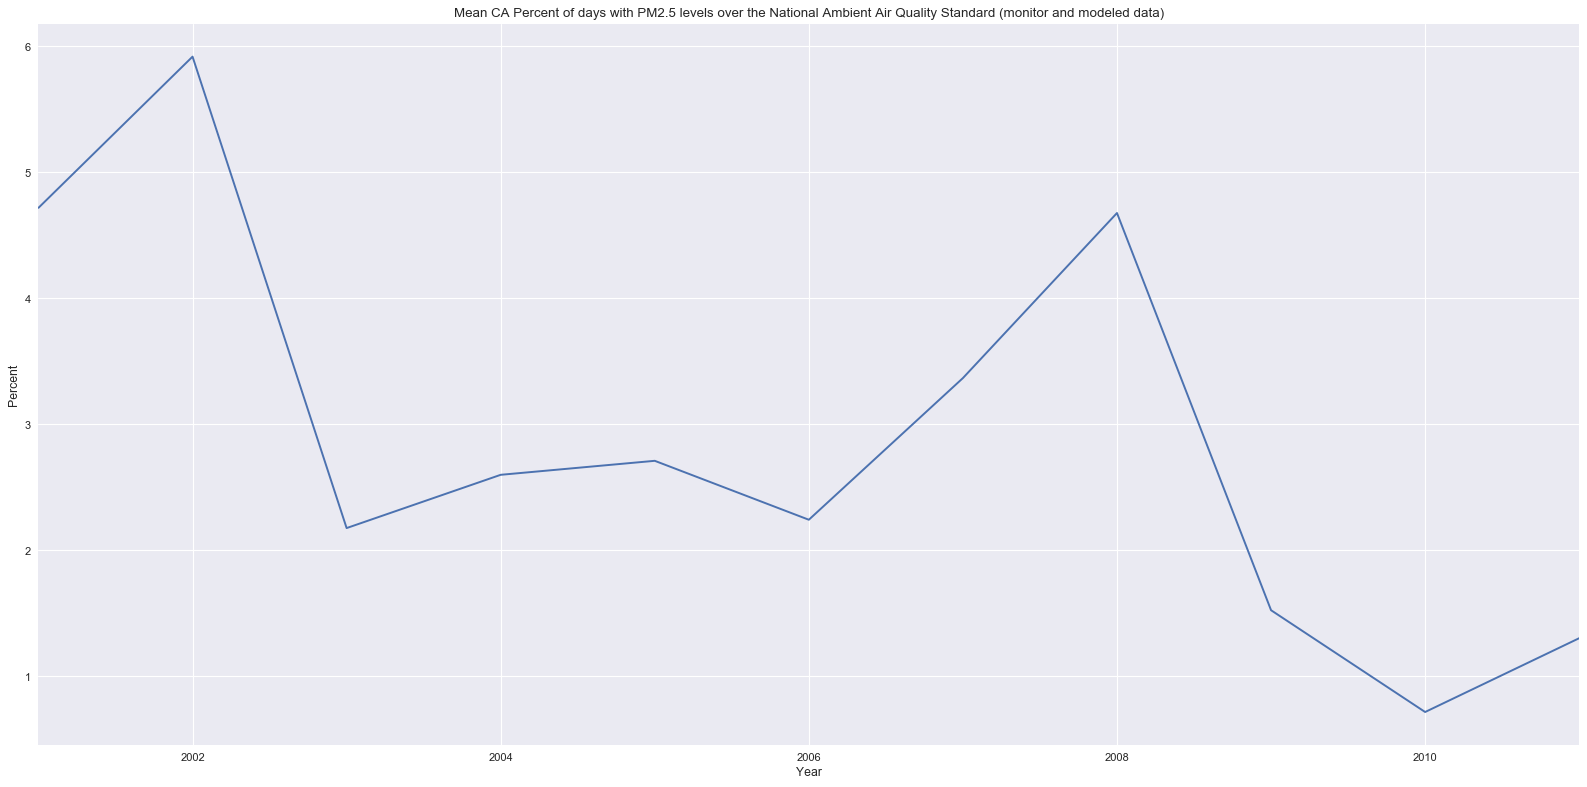

In [98]:
num = 294
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Mean CA {}'.format(dic[num][0]))
sns.tsplot(data=ca[num], time=ca['Year'], value=dic[num][1])
plt.tight_layout()

/Users/d/anaconda/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


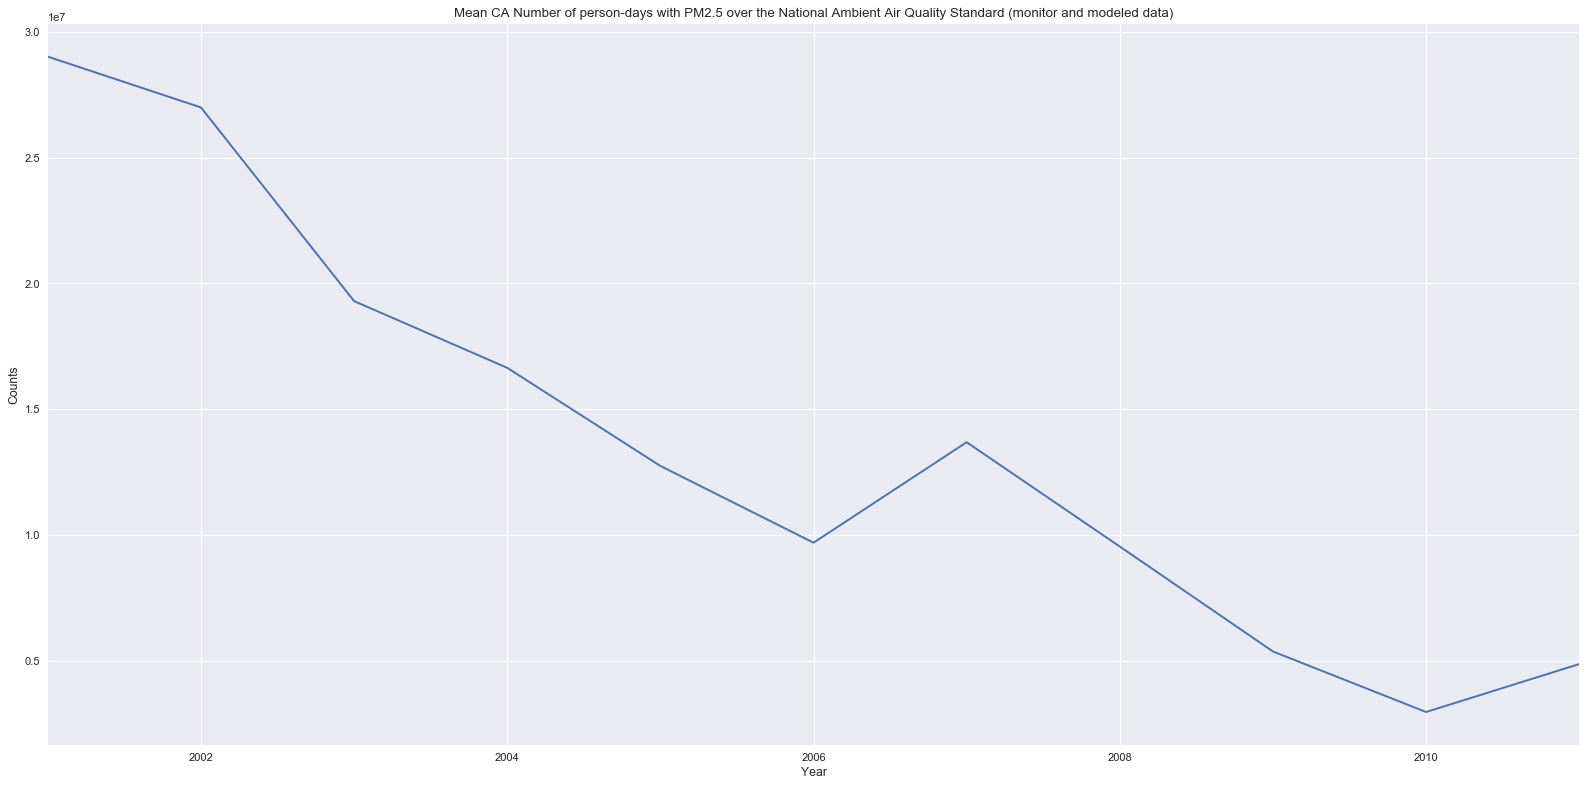

In [99]:
num = 295
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Mean CA {}'.format(dic[num][0]))
sns.tsplot(data=ca[num], time=ca['Year'], value=dic[num][1])
plt.tight_layout()

/Users/d/anaconda/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


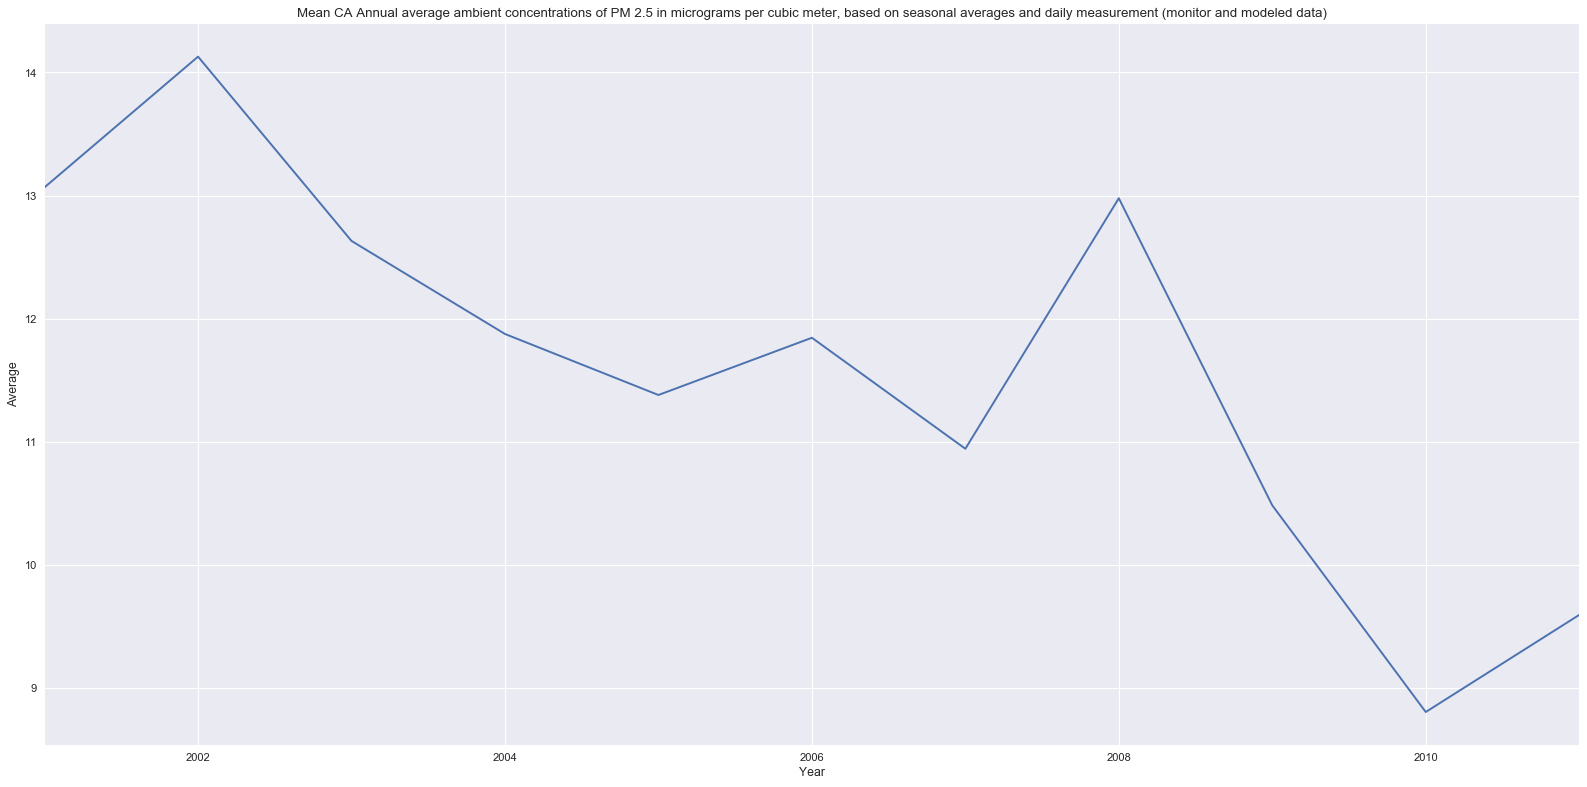

In [100]:
num = 296
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Mean CA {}'.format(dic[num][0]))
sns.tsplot(data=ca[num], time=ca['Year'], value=dic[num][1])
plt.tight_layout()